## Постановка задачи

15 апреля 1912 года, во время своего первого рейса, широко известный как “непотопляемый” "Титаник" затонул после столкновения с айсбергом. К сожалению, спасательных шлюпок для всех находившихся на борту не хватило, в результате чего погибло 1502 из 2224 пассажиров и членов экипажа.

Хотя в выживании был определенный элемент везения, похоже, что у некоторых групп людей было больше шансов выжить, чем у других.

В этой задаче необходимо построить прогностическую модель, которая отвечает на вопрос: “У каких людей было больше шансов выжить?”, используя данные о пассажирах (например, имя, возраст, пол, социально-экономический класс и т.д.).

### В каком виде хранятся исходные данные?

Обычно в задаче анализа данных имеется некоторая прямоугольная таблица. Ее строки соответствуют объектам, а столбцы – признакам этих объектов. Объекты также называются наблюдениями или примерами (samples), а признаки – атрибутами (features).

Признаки бывают количественными (как, например, доход в рублях или рост в сантиметрах и т.д.) или категориальными (как, например, марка автомобиля, модель телефона и т.д.).

Один из признаков (столбцов) выделен. Этот признак называется ответом. Остальные признаки – входные. Требуется по имеющейся таблице научиться по новому объекту, которого нет в таблице, но для которого известны значения входных признаков, по возможности с небольшой ошибкой предсказывать значение выделенного признака (ответа).

Если ответ количественный, то задача называется задачей восстановления регрессии. Если ответ категориальный, то задача называется задачей классификации.

Взято из руководства https://mlbootcamp.ru/ru/article/tutorial/

### Стадии решения задачи

- подключение модулей (import modules)
- загрузка данных (data lodaing)
- разведочный анализ данных (exploratory data analysis, EDA)
- предварительная обработка данных (preprocessing)
- обучение моделей (models fitting)
- прогнозирование (prediction)

### Подключение модулей

In [2]:
# импортируем необходимые модули
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Загрузка данных

In [3]:
# загружаем данные из файла в формате CSV и сохраняем в дата-фрейм (переменную df)
df = pd.read_csv('titanic.csv')

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Описание данных

В любом хорошем исследовании к данным прилагается легенда — описание переменных, которые будут использоваться в анализе и история сбора данных. В нашем случае она выглядит так:

__PassengerId__ — уникальный ID пассажира

__Survived__ — выжил пассажир или нет (0 - нет, 1 - да)

__Pclass__ — класс каюты (1 - 1-ый класс, 2 - 2-ой класс; 3 - 3-ий класс)

__Name__ — имя пассажира

__Sex__ — пол пассажира (male - мужской, female - женский)

__Age__ — возраст пассажира

__SibSp__ — количество братьев и сестер / супругов за границей 

__Parch__ — количество родителей / детей на борту

__Ticket__ — номер билета

__Fare__ — стоимость билета (британские фунты)

__Cabin__ — номер каюты

__Embarked__ — порт посадки (C = Шербур, Q = Квинстаун, S = Саутгемптон)

### Разведочный анализ данных (РАД, EDA)

На какие вопросы может дать ответы РАД?
- сколько у нас данных? (кол-во объектов и их признаков)
- какие типы данных имеют признаки?
- какой признак является целевым (target)? С какой задачей мы имеем дело? (классификация или регрессия)
- сколько значений пропущено в различных колонках?
- какова статистика распределения значений признаков? Есть ли выбросы (аномальные наблюдения)?
- как признаки соотносятся между собой (коррелируют, влияют друг на друга)? Как признаки влияют на целевой признак?
- для задач классификации: сколько у нас классов - два или больше? Сбалансированы ли классы?
- и др.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
# объём данных (строк и столбцов - объектов и признаков)
df.shape

(891, 12)

In [6]:
# выводим типы данных
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
# имена колонок в виде списка
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
PassengerId,891.0,446.000000,257.353842,1.00,223.5000,446.0000,668.5,891.0000
Survived,891.0,0.383838,0.486592,0.00,0.0000,0.0000,1.0,1.0000
Pclass,891.0,2.308642,0.836071,1.00,2.0000,3.0000,3.0,3.0000
Age,714.0,29.699118,14.526497,0.42,20.1250,28.0000,38.0,80.0000
SibSp,891.0,0.523008,1.102743,0.00,0.0000,0.0000,1.0,8.0000
Parch,891.0,0.381594,0.806057,0.00,0.0000,0.0000,0.0,6.0000
Fare,891.0,32.204208,49.693429,0.00,7.9104,14.4542,31.0,512.3292


In [10]:
df.describe(include=['O'])

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


Построим гистограммы распределения каждого признака (столбца данных)

array([[<Axes: title={'center': 'PassengerId'}>,
        <Axes: title={'center': 'Survived'}>,
        <Axes: title={'center': 'Pclass'}>],
       [<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'SibSp'}>,
        <Axes: title={'center': 'Parch'}>],
       [<Axes: title={'center': 'Fare'}>, <Axes: >, <Axes: >]],
      dtype=object)

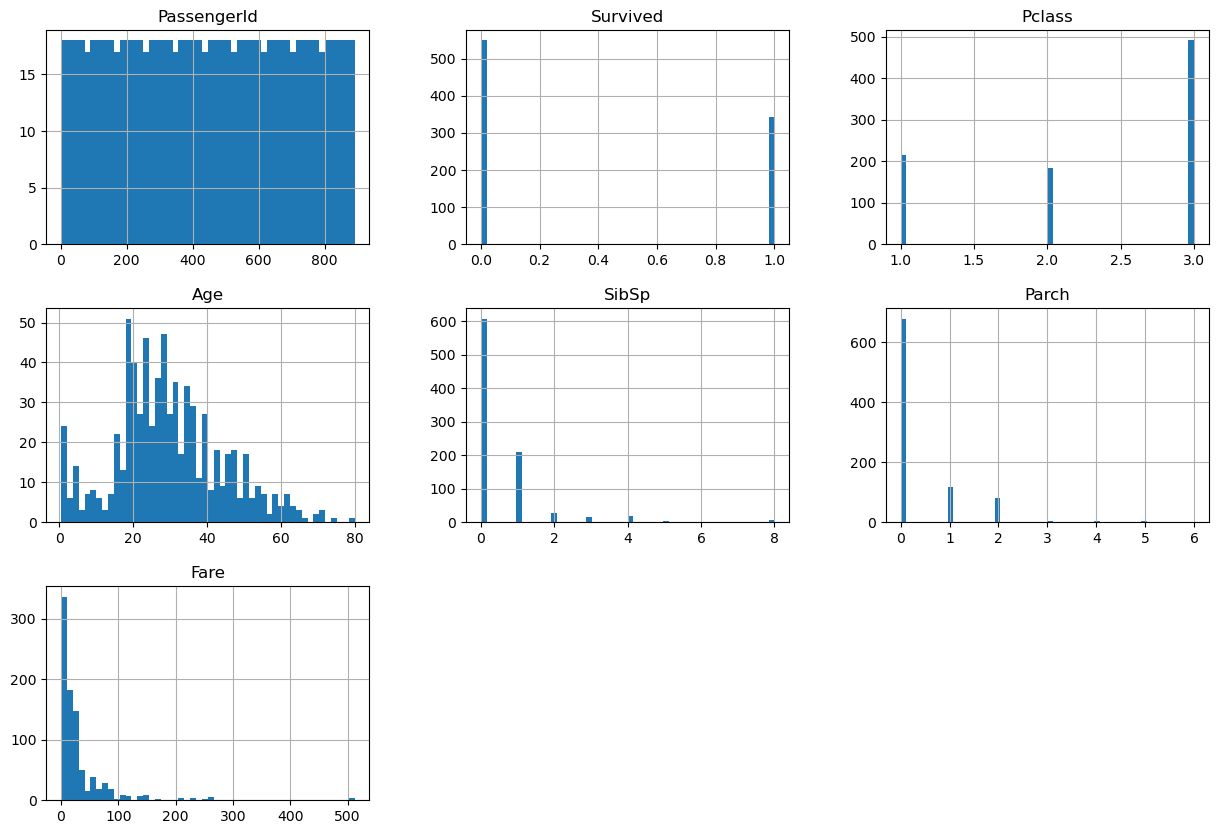

In [11]:
df.hist(figsize = (15,10), bins = 50)

Определим, сколько мужчин и сколько женщин находилось на борту

In [12]:
df["Sex"].value_counts()

male      577
female    314
Name: Sex, dtype: int64

Выведим распределение переменной Pclass по всем классам (социально-экономический статус) и это же распределение, только для
мужчин / женщин по отдельности.  

In [13]:
df["Pclass"].value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [14]:
df[df["Sex"] == "female"]["Pclass"].value_counts()

3    144
1     94
2     76
Name: Pclass, dtype: int64

In [15]:
df[df["Sex"] == "male"]["Pclass"].value_counts()

3    347
1    122
2    108
Name: Pclass, dtype: int64

In [16]:
df[(df["Sex"] == "male") &(df["Pclass"] == 2)].count()[0]

108

Построим попарные зависимости признаков Age, Fare, Pclass, Sex, SibSp, Parch, Embarked и Survived

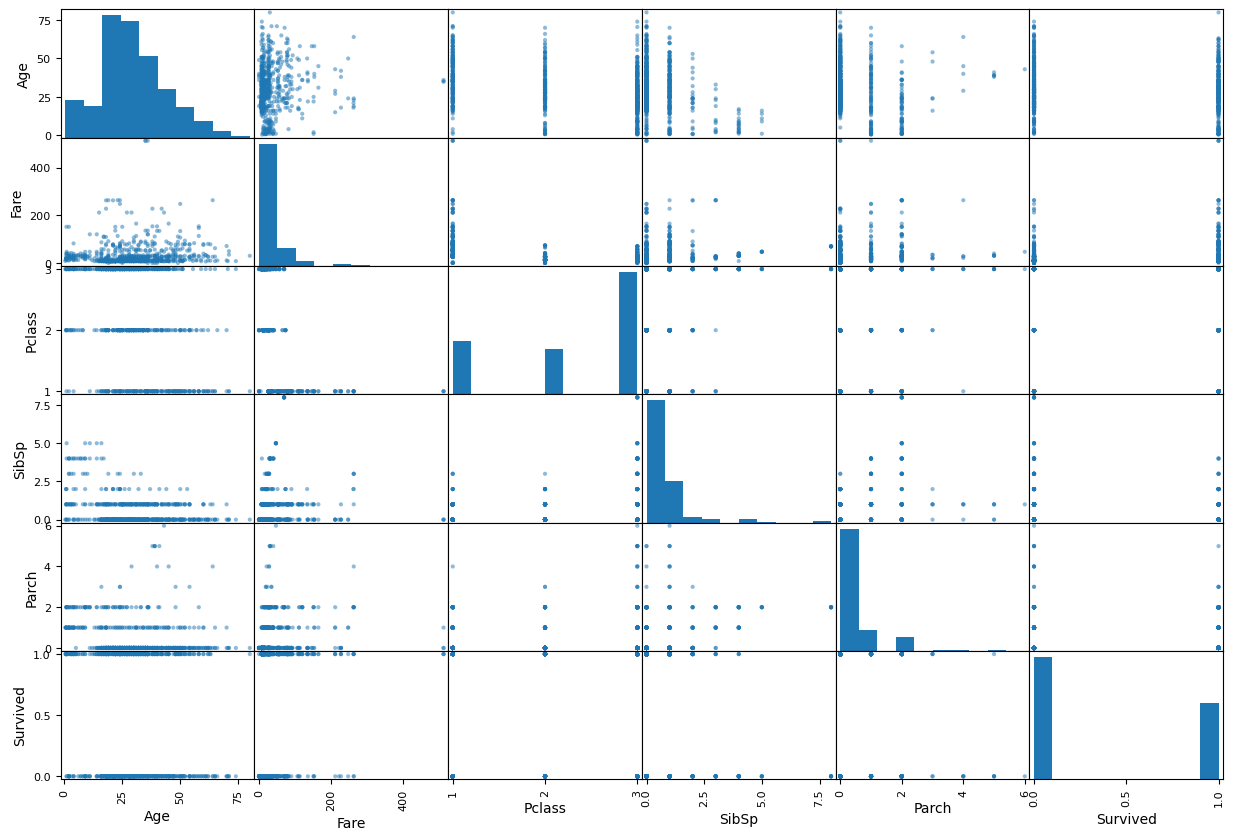

In [17]:
pd.plotting.scatter_matrix(df[["Age", "Fare", "Pclass", "Sex", "SibSp", "Parch", "Embarked", "Survived"]], figsize=(15,10));

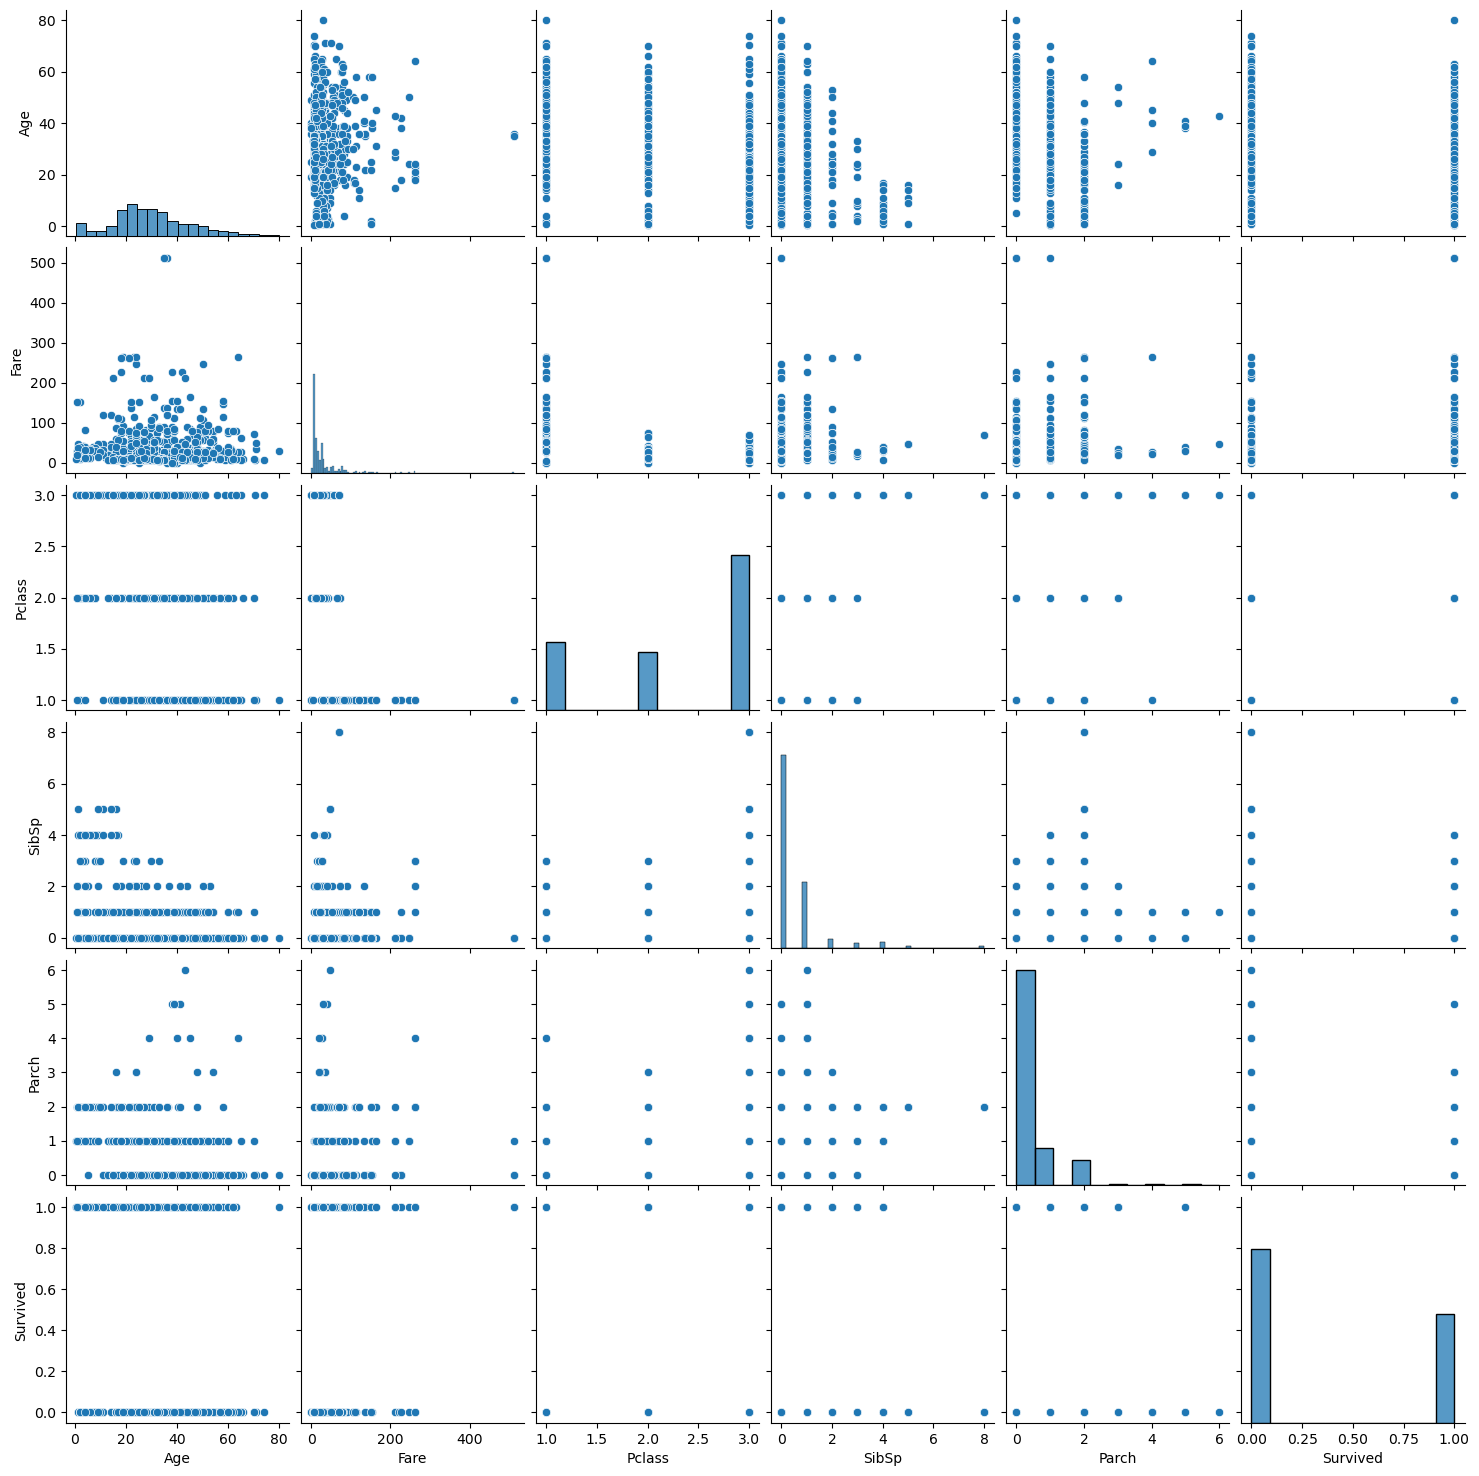

In [18]:
sns.pairplot(df[["Age", "Fare", "Pclass", "Sex", "SibSp", "Parch", "Embarked", "Survived"]])

Как плата за билет (Fare) зависит от класса каюты (Pclass)?

<Figure size 1000x800 with 0 Axes>

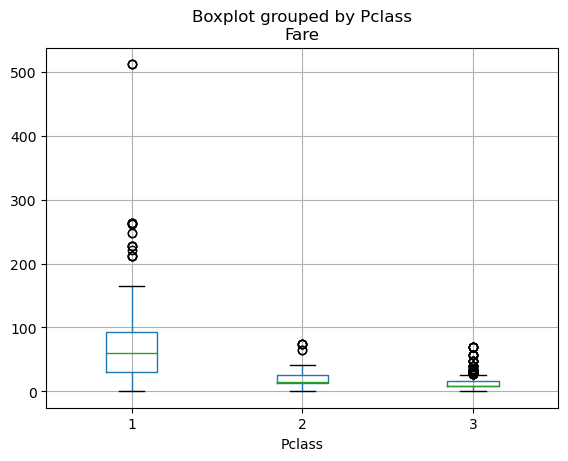

In [5]:
plt.figure(figsize=(10,8))
df.boxplot(column = "Fare", by = "Pclass");

<Axes: xlabel='Pclass', ylabel='Fare'>

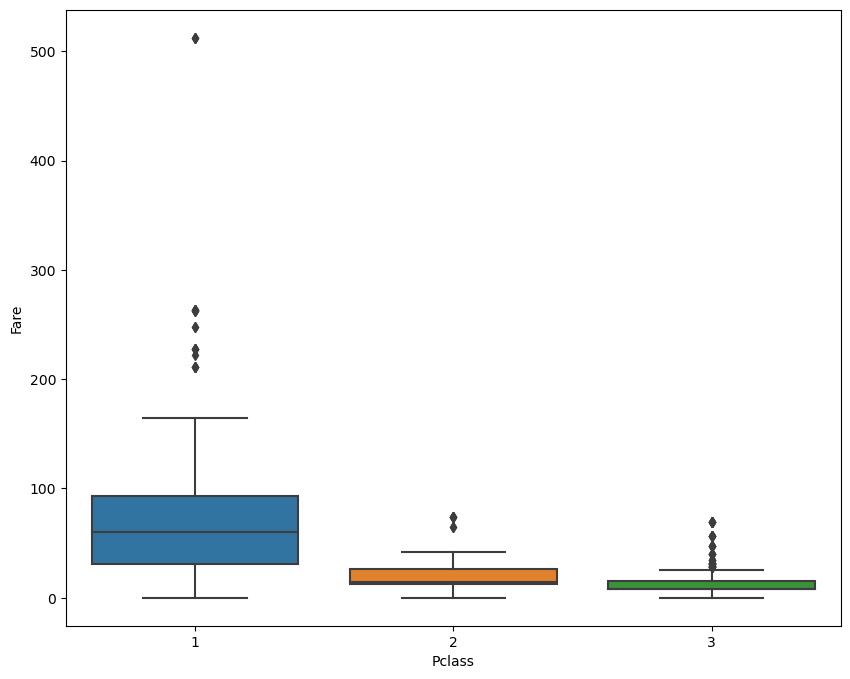

In [20]:
plt.figure(figsize=(10, 8))
sns.boxplot(x='Pclass', y='Fare', data = df)

Оценим, сколько всего пассажиров выжило на Титанике

<Axes: xlabel='Survived', ylabel='count'>

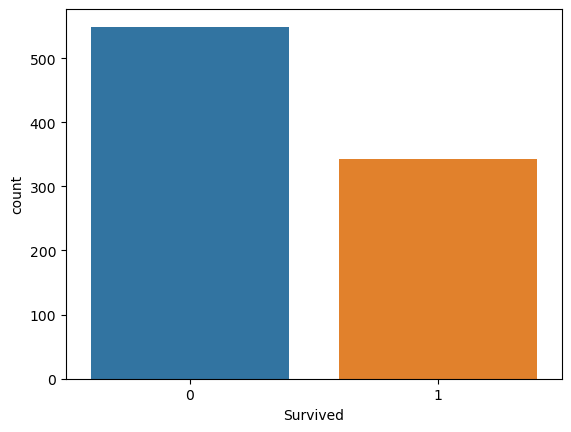

In [21]:
sns.countplot(x = 'Survived', data = df)

Влияет ли пол на выживаемость людей? Каково соотношение погибших и выживших в зависимости от пола?

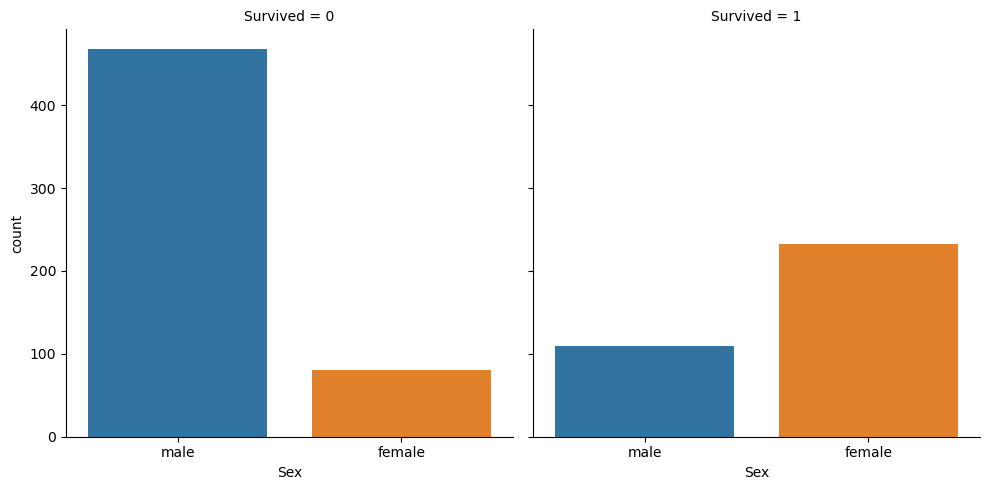

In [22]:
sns.catplot(x = 'Sex', col = 'Survived', kind = 'count', data = df)

<Axes: xlabel='Survived', ylabel='count'>

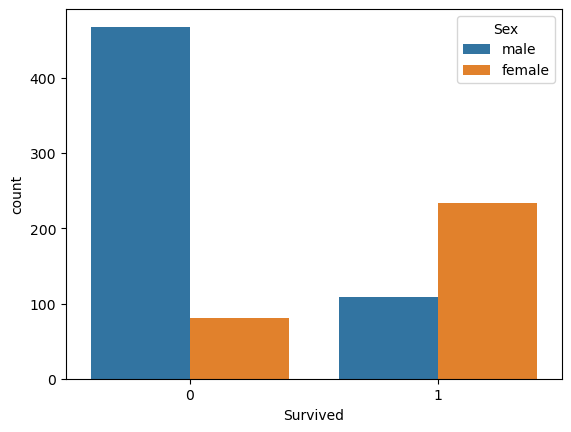

In [23]:
sns.countplot(data = df, x ="Survived", hue = "Sex")

Каково соотношение погибших и выживших в зависимости от класса каюты?

<Axes: xlabel='Survived', ylabel='count'>

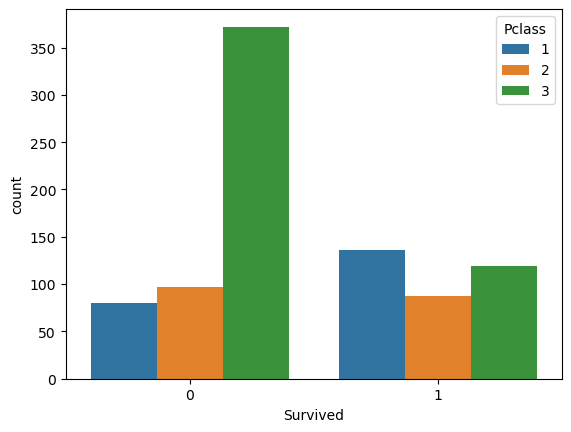

In [24]:
sns.countplot(data = df, x ="Survived", hue = "Pclass")

Как факт выживания зависит от возраста пассажира? Проверим (графически) предположение, что молодые чаще выживали. Пусть, условно, молодые - младше 30 лет, пожилые – старше 60 лет.


In [6]:
df['Age_categ'] = df['Age'].apply(lambda x: 1 if x <30 else 3 if x >60 else 2)

In [7]:
df.tail(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categ
881,882,0,3,"Markun, Mr. Johann",male,33.0,0,0,349257,7.8958,NaN,S,2
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S,1
883,884,0,2,"Banfield, Mr. Frederick James",male,28.0,0,0,C.A./SOTON 34068,10.5000,NaN,S,1
884,885,0,3,"Sutehall, Mr. Henry Jr",male,25.0,0,0,SOTON/OQ 392076,7.0500,NaN,S,1
885,886,0,3,"Rice, Mrs. William (Margaret Norton)",female,39.0,0,5,382652,29.1250,NaN,Q,2
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,2
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,1
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.7500,NaN,Q,2


<Axes: xlabel='Age_categ', ylabel='count'>

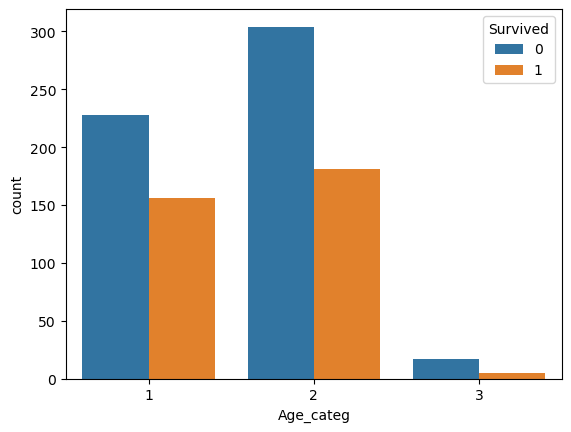

In [27]:
sns.countplot(x='Age_categ', hue='Survived', data=df)

Построим график рассеяния на осях Age и Fare.

Cиним отметим пассажиров, которые не выжили (Survived = 0) и красным — выживших (Survived = 1).

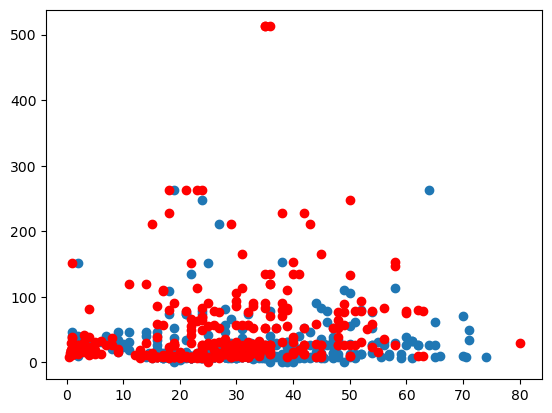

In [28]:
plt.scatter(df[df["Survived"]==0]["Age"],df[df["Survived"]==0]["Fare"]);
plt.scatter(df[df["Survived"]==1]["Age"],df[df["Survived"]==1]["Fare"], c = "r");


In [8]:
df[df["Fare"]>300]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categ
258,259,1,1,"Ward, Miss. Anna",female,35.0,0,0,PC 17755,512.3292,NaN,C,2
679,680,1,1,"Cardeza, Mr. Thomas Drake Martinez",male,36.0,0,1,PC 17755,512.3292,B51 B53 B55,C,2
737,738,1,1,"Lesurer, Mr. Gustave J",male,35.0,0,0,PC 17755,512.3292,B101,C,2


In [9]:
corr = df.corr()

In [10]:
corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Age_categ
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658,0.032362
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307,-0.051589
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500,-0.207478
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067,0.836826
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651,-0.116500
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225,-0.118527
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000,0.056692
Age_categ,0.032362,-0.051589,-0.207478,0.836826,-0.116500,-0.118527,0.056692,1.000000


<Axes: >

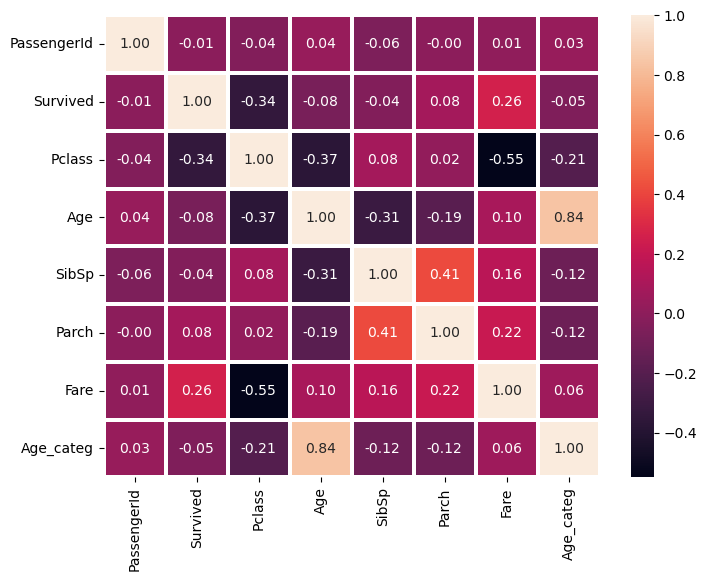

In [32]:
plt.figure(figsize=(8,6))
sns.heatmap(corr, annot = True, linewidths=1.5 , fmt = '.2f')

### Предварительная обработка данных (preprocessing)

Какие действия выполняются в процессе предварительной подготовки?
- преобразование типов данных (в т.ч. преобразование категориальных признаков в набор фиктивных бинарных признаков)
- удаление выбросов
- заполнение пропусков
- нормализация (масштабирование) числовых признаков
- формирование дата-сета для обучения моделей (исключение признаков, объединение с фиктивными признаками и др.)

### Преобразование типов

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
 12  Age_categ    891 non-null    int64  
dtypes: float64(2), int64(6), object(5)
memory usage: 90.6+ KB


In [11]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Age_categ
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,2
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,2
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,2


In [12]:
# замена значений для указанного признака
df['Sex'].replace('male', 0, inplace=True)
df['Sex'].replace('female', 1, inplace=True)

In [13]:
# d = {'male':0, 'female':1}
# df['Sex']=df['Sex'].map(d)

In [14]:
# преобразование типов
# df['Age'] = df['Age'].astype('int64')

### Пропущенные значения

In [15]:
# сколько пропусков в дата-фрейме ?
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
Age_categ        0
dtype: int64

In [16]:
for col in df.columns:
    print(f'Процент пропусков в колонке {col} = {df[col].isna().sum() / df.shape[0] * 100: .2f}')

Процент пропусков в колонке PassengerId =  0.00
Процент пропусков в колонке Survived =  0.00
Процент пропусков в колонке Pclass =  0.00
Процент пропусков в колонке Name =  0.00
Процент пропусков в колонке Sex =  0.00
Процент пропусков в колонке Age =  19.87
Процент пропусков в колонке SibSp =  0.00
Процент пропусков в колонке Parch =  0.00
Процент пропусков в колонке Ticket =  0.00
Процент пропусков в колонке Fare =  0.00
Процент пропусков в колонке Cabin =  77.10
Процент пропусков в колонке Embarked =  0.22
Процент пропусков в колонке Age_categ =  0.00


In [38]:
for col in df.columns:
    print('Кол-во пропусков в колонке %s = %d' % (col, df[col].isna().sum()))

Кол-во пропусков в колонке PassengerId = 0
Кол-во пропусков в колонке Survived = 0
Кол-во пропусков в колонке Pclass = 0
Кол-во пропусков в колонке Name = 0
Кол-во пропусков в колонке Sex = 0
Кол-во пропусков в колонке Age = 177
Кол-во пропусков в колонке SibSp = 0
Кол-во пропусков в колонке Parch = 0
Кол-во пропусков в колонке Ticket = 0
Кол-во пропусков в колонке Fare = 0
Кол-во пропусков в колонке Cabin = 687
Кол-во пропусков в колонке Embarked = 2
Кол-во пропусков в колонке Age_categ = 0


<AxesSubplot:>

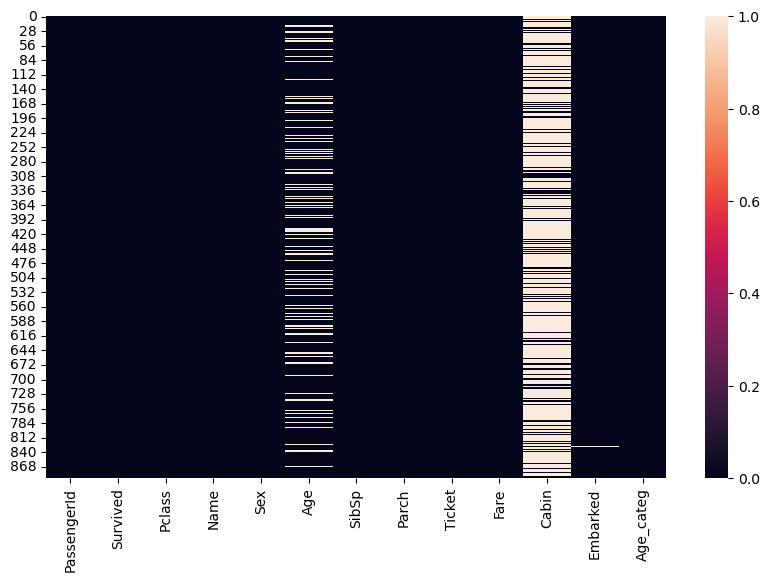

In [17]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna())

<Axes: >

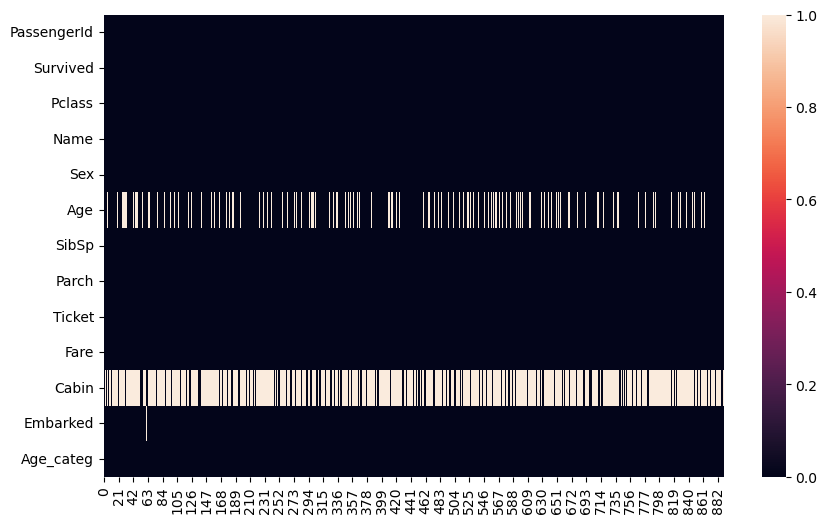

In [40]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose())

In [18]:
# Удалим переменную Cabin (номер каюты)
df.drop(columns = 'Cabin', axis = 1, inplace = True)

In [19]:
# Заменим пустые значения в признаке Age (возраст) медианой
df['Age'].fillna(df['Age'].median(), inplace = True)

In [20]:
# Определяеи наиболее часто встречающее значение в Embarked
embarked_col = df.Embarked.dropna().mode()[0]
embarked_col

'S'

In [21]:
# Удалим пустые строки в Embarked
# df.dropna(inplace = True)

In [22]:
df['Embarked'].fillna(embarked_col, inplace = True)

<AxesSubplot:>

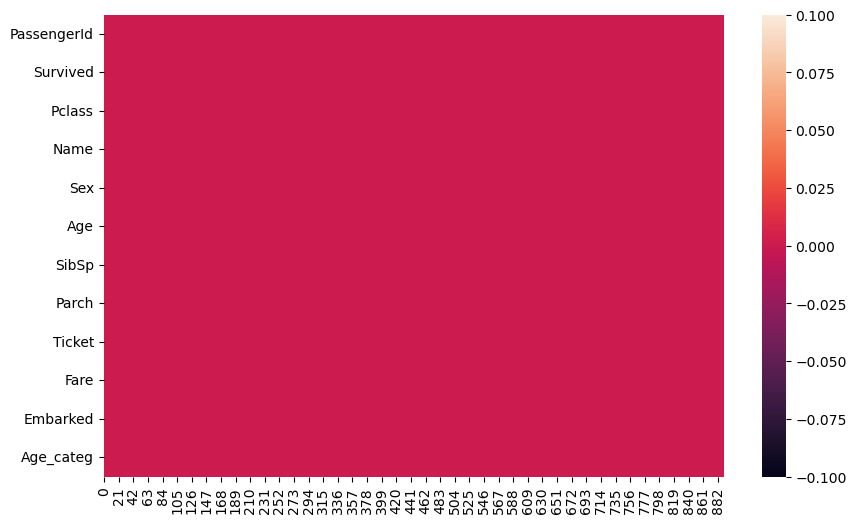

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna().transpose())

In [24]:
df.shape

(891, 12)

### Преобразование небинарных категориальных признаков в набор фиктивных бинарных

In [25]:
# генерация бинарных колонок (фиктивных переменных) для категориального признака Embarked
embarked_cols = pd.get_dummies(df["Embarked"])
embarked_cols.head()

,C,Q,S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1


### Формирование дата-сета для обучения моделей

In [26]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Age_categ
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,C,2
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,S,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,S,2
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,S,2
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",0,27.0,0,0,211536,13.0000,S,1
887,888,1,1,"Graham, Miss. Margaret Edith",1,19.0,0,0,112053,30.0000,S,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",1,28.0,1,2,W./C. 6607,23.4500,S,2
889,890,1,1,"Behr, Mr. Karl Howell",0,26.0,0,0,111369,30.0000,C,1


In [27]:
# список имён признаков, которые будут использоваться для построения модели
features_names = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']

In [28]:
X = pd.concat([df[features_names], embarked_cols], axis = 1)

In [29]:
# выделение целевой переменной (таргета) в отдельный вектор
y = df["Survived"]

In [30]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,C,Q,S
0,3,0,22.0,1,0,7.2500,0,0,1
1,1,1,38.0,1,0,71.2833,1,0,0
2,3,1,26.0,0,0,7.9250,0,0,1
3,1,1,35.0,1,0,53.1000,0,0,1
4,3,0,35.0,0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...,...
886,2,0,27.0,0,0,13.0000,0,0,1
887,1,1,19.0,0,0,30.0000,0,0,1
888,3,1,28.0,1,2,23.4500,0,0,1
889,1,0,26.0,0,0,30.0000,1,0,0


### Обучение моделей (models fitting)

In [31]:
# Разделяем выборку на обучающую и тестовую 
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [32]:
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(596, 9) (295, 9) (596,) (295,)


In [33]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression

In [34]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [35]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

KNeighborsClassifier()

### Прогнозирование (prediction)

In [36]:
knn_predict = knn.predict(X_test)

C:\Users\Admin\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [37]:
accuracy_score(knn_predict, y_test)

0.7186440677966102

In [38]:
confusion_matrix(knn_predict, y_test)

array([[143,  51],
       [ 32,  69]], dtype=int64)

In [39]:
print(classification_report(knn_predict, y_test))

              precision    recall  f1-score   support

           0       0.82      0.74      0.78       194
           1       0.57      0.68      0.62       101

    accuracy                           0.72       295
   macro avg       0.70      0.71      0.70       295
weighted avg       0.73      0.72      0.72       295



In [40]:
svc = SVC()
svc.fit(X_train, y_train)

SVC()

In [41]:
svc_predict = svc.predict(X_test)

In [42]:
accuracy_score(svc_predict, y_test)

0.6644067796610169

In [43]:
confusion_matrix(svc_predict, y_test)

array([[164,  88],
       [ 11,  32]], dtype=int64)

In [44]:
print(classification_report(svc_predict, y_test))

              precision    recall  f1-score   support

           0       0.94      0.65      0.77       252
           1       0.27      0.74      0.39        43

    accuracy                           0.66       295
   macro avg       0.60      0.70      0.58       295
weighted avg       0.84      0.66      0.71       295



In [45]:
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

DecisionTreeClassifier()

In [71]:
dtc_predict = dtc.predict(X_test)

In [72]:
accuracy_score(dtc_predict, y_test)

0.7389830508474576

In [73]:
confusion_matrix(dtc_predict, y_test)

array([[134,  36],
       [ 41,  84]], dtype=int64)

In [74]:
print(classification_report(dtc_predict, y_test))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       170
           1       0.70      0.67      0.69       125

    accuracy                           0.74       295
   macro avg       0.73      0.73      0.73       295
weighted avg       0.74      0.74      0.74       295



In [59]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)

RandomForestClassifier()

In [75]:
rfc_predict = rfc.predict(X_test)

In [76]:
accuracy_score(rfc_predict, y_test)

0.7694915254237288

In [77]:
confusion_matrix(rfc_predict, y_test)

array([[142,  35],
       [ 33,  85]], dtype=int64)

In [78]:
print(classification_report(rfc_predict, y_test))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81       177
           1       0.71      0.72      0.71       118

    accuracy                           0.77       295
   macro avg       0.76      0.76      0.76       295
weighted avg       0.77      0.77      0.77       295



In [60]:
gnb = GaussianNB()
gnb.fit(X_train, y_train)

GaussianNB()

In [79]:
gnb_predict = gnb.predict(X_test)

In [80]:
accuracy_score(gnb_predict, y_test)

0.7864406779661017

In [81]:
confusion_matrix(gnb_predict, y_test)

array([[141,  29],
       [ 34,  91]], dtype=int64)

In [82]:
print(classification_report(gnb_predict, y_test))

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       170
           1       0.76      0.73      0.74       125

    accuracy                           0.79       295
   macro avg       0.78      0.78      0.78       295
weighted avg       0.79      0.79      0.79       295



In [61]:
lrn = LogisticRegression()
lrn.fit(X_train, y_train)

C:\Users\rezed\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [83]:
lrn_predict = lrn.predict(X_test)

In [84]:
accuracy_score(lrn_predict, y_test)

0.8169491525423729

In [85]:
confusion_matrix(lrn_predict, y_test)

array([[154,  33],
       [ 21,  87]], dtype=int64)

In [86]:
print(classification_report(lrn_predict, y_test))

              precision    recall  f1-score   support

           0       0.88      0.82      0.85       187
           1       0.72      0.81      0.76       108

    accuracy                           0.82       295
   macro avg       0.80      0.81      0.81       295
weighted avg       0.82      0.82      0.82       295



In [87]:
%%time
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

CPU times: total: 0 ns
Wall time: 5.61 ms


KNeighborsClassifier()

### Прогнозирование (prediction)

In [88]:
# Предсказываем на обучающей и тестовой выборке
y_train_predict = knn.predict(X_train)
y_test_predict = knn.predict(X_test)

err_train = np.mean(y_train != y_train_predict)
err_test  = np.mean(y_test  != y_test_predict)
print(err_train, err_test)

0.21308724832214765 0.28135593220338984


In [116]:
# Проверяем точноcть предсказания
from sklearn.metrics import accuracy_score

print('train accuracy: ', accuracy_score(y_train, y_train_predict, normalize=True))
print('test accuracy: ', accuracy_score(y_test, y_test_predict, normalize=True))

train accuracy:  0.7869127516778524
test accuracy:  0.7186440677966102


In [90]:
knn.score(X_test, y_test)

0.7186440677966102

In [108]:
np.array(y_train[:10])

array([0, 0, 0, 0, 0, 1, 1, 0, 0, 1], dtype=int64)

In [106]:
y_train_predict[:10]

array([1, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [100]:
y_test[:10]

709    1
439    0
840    0
720    1
39     1
290    1
300    1
333    0
208    1
136    1
Name: Survived, dtype: int64

In [109]:
np.array(y_test[:10])

array([1, 0, 0, 1, 1, 1, 1, 0, 1, 1], dtype=int64)

In [99]:
y_test_predict[:10]

array([0, 0, 0, 1, 0, 1, 1, 0, 1, 1], dtype=int64)

C:\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\МОиБД\AppData\Local\Temp\ipykernel_11352\1792787818.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\МОиБД\AppData\Local\Temp\ipykernel_11352\1792787818.py:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  log = log.append(log_entry)
C:\Users\МОиБД\AppData\Local\Temp\ip

<Axes: title={'center': 'Classifier Accuracy'}, xlabel='Accuracy', ylabel='Classifier'>

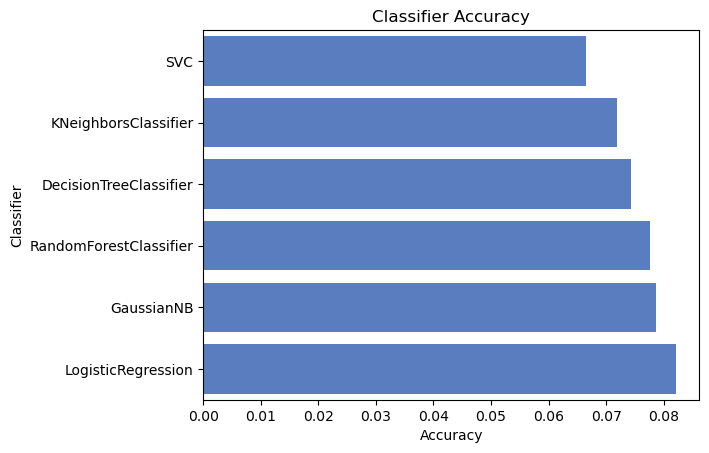

In [17]:
classifiers = [
    KNeighborsClassifier(5),
    SVC(probability=True, kernel='rbf'),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    GaussianNB(),
    LogisticRegression(),
]

log_cols = ["Classifier", "Accuracy"]
log = pd.DataFrame(columns=log_cols)

# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)
acc_dict = {}

for clf in classifiers:
	name = clf.__class__.__name__
	clf.fit(X_train, y_train)
	train_predictions = clf.predict(X_test)
	acc = accuracy_score(y_test, train_predictions)
	if name in acc_dict:
		acc_dict[name] += acc
	else:
		acc_dict[name] = acc

for clf in acc_dict:
	acc_dict[clf] = acc_dict[clf] / 10.0
	log_entry = pd.DataFrame([[clf, acc_dict[clf]]], columns=log_cols)
	log = log.append(log_entry)

plt.xlabel('Accuracy')
plt.title('Classifier Accuracy')

sns.set_color_codes("muted")
sns.barplot(x='Accuracy', y='Classifier', data=log.sort_values(by='Accuracy'), color="b")

In [18]:
log

,Classifier,Accuracy
0,KNeighborsClassifier,0.071864
0,SVC,0.066441
0,DecisionTreeClassifier,0.074237
0,RandomForestClassifier,0.077627
0,GaussianNB,0.078644
0,LogisticRegression,0.082034
